# Real State Price Predictor

In [1]:
import pandas as pd

# means we need to show plots in this file only
%matplotlib inline

import numpy as np


In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,NaN,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATION'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

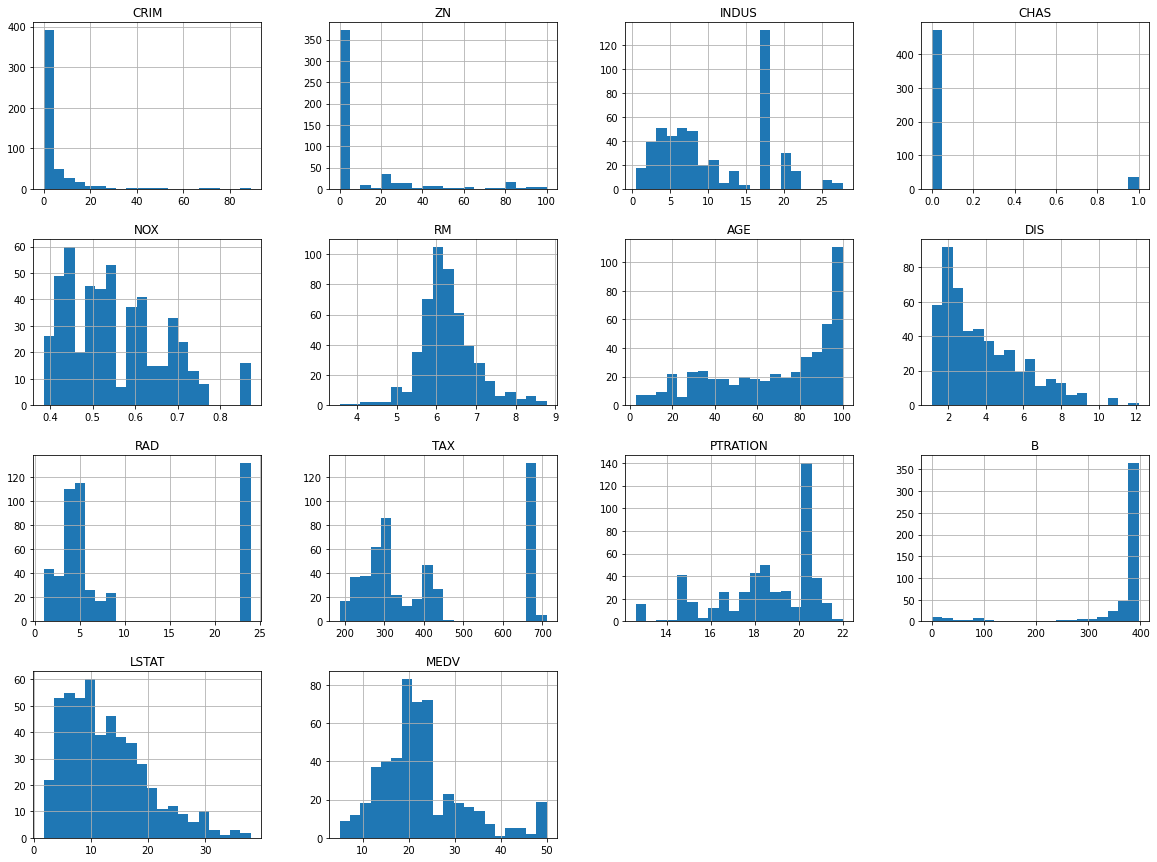

In [4]:
# For plotting histograms

import matplotlib.pyplot as plt
housing.hist(bins=20, figsize=(20, 15))

## Train-Test Splitting

In [5]:
def split_train_test(data, test_ratio):
    np.random.seed(42)
    
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data)*test_ratio)
    
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]
    

In [6]:
# train_set, test_set = split_train_test(housing, 0.2)

# print(f"Train set : {len(train_set)}\nTest Set : {len(test_set)}")

In [7]:
# from sklearn.model_selection import train_test_split;

# train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

# print(f"Train set : {len(train_set)}\nTest Set : {len(test_set)}")

In [8]:
#straitified Random Sampling to split the data equally feature-wise
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=5, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    
strat_test_set.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV
350,0.06211,40.0,1.25,0,0.429,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,22.9
187,0.07875,45.0,3.44,0,0.437,NaN,41.1,3.7886,5,398,15.2,393.87,6.68,32.0
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
195,0.01381,80.0,0.46,0,0.422,7.875,32.0,5.6484,4,255,14.4,394.23,2.97,50.0
175,0.06664,0.0,4.05,0,0.510,6.546,33.1,3.1323,5,296,16.6,390.96,5.33,29.4


In [9]:
# Data processing and correlation should be done on train set
housing = strat_train_set.copy()

## Looking for correlation

Correlation will help us to see the relation between features.
If the data have some outliers (means the commom relation is not satified), then we can remove it. For eg. MEDV is directly proportional to RM and inversely proportional to LSTAT. So any deviation from this can be removed.

In [10]:
corr_matrix = housing.corr();
# corr_matrix.head()

corr_matrix['MEDV'].sort_values(ascending=False)

MEDV        1.000000
RM          0.717751
ZN          0.331983
B           0.312481
DIS         0.239204
CHAS        0.169625
RAD        -0.360931
AGE        -0.362472
CRIM       -0.389661
NOX        -0.419263
TAX        -0.445126
INDUS      -0.458958
PTRATION   -0.476419
LSTAT      -0.736789
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

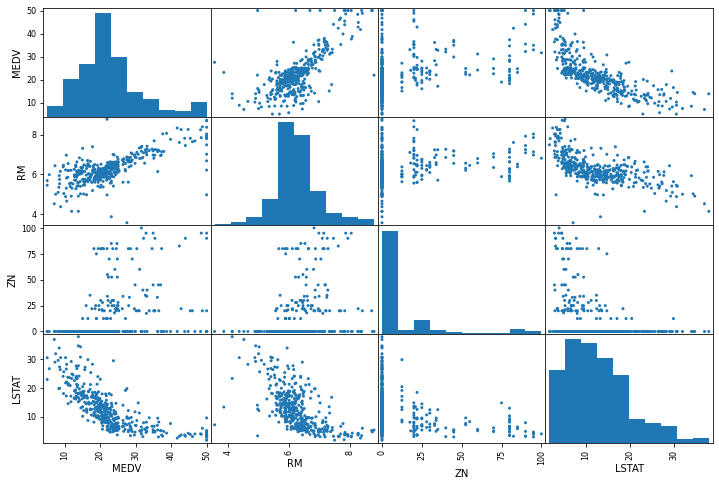

In [11]:
# Plotting the scatter plot of correlation matrix
from pandas.plotting import scatter_matrix

attributes = ["MEDV","RM", "ZN", "LSTAT"]

scatter_matrix(housing[attributes], figsize=(12, 8), alpha=1)

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

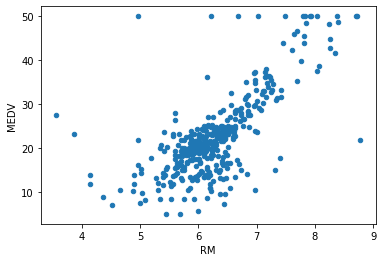

In [12]:
# As we can see there are some outliers at the boundary of plot. For eg. MEDV 50 is constant, it doesn't depends upon RM value

housing.plot(kind="scatter", y="MEDV", x="RM",alpha = 1)

## Trying out combinations of attributes

In [13]:
housing['TAXRM'] = housing['TAX']/housing['RM']
housing.head() # Orginial data is not changing only housing dataframe is changing

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT,MEDV,TAXRM
257,0.61154,20.0,3.97,0,0.647,8.704,86.9,1.8010,5,264,13.0,389.70,5.12,50.0,30.330882
429,9.33889,0.0,18.10,0,0.679,6.380,95.6,1.9682,24,666,20.2,60.72,24.08,9.5,104.388715
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948
214,0.28955,0.0,10.59,0,0.489,5.412,9.8,3.5875,4,277,18.6,348.93,29.55,23.7,51.182557
430,8.49213,0.0,18.10,0,0.584,6.348,86.1,2.0527,24,666,20.2,83.45,17.64,14.5,104.914934


<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

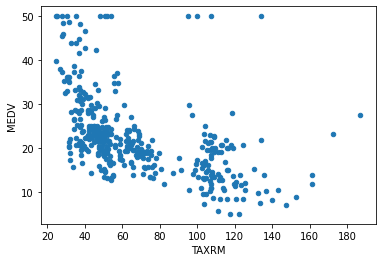

In [14]:
# TAXRM has now strong decreasing correlation with MEDV
housing.plot(kind="scatter", y="MEDV", x="TAXRM",alpha = 1)

In [15]:
housing = strat_train_set.drop("MEDV", axis=1) #dropping the label column
housing_labels = strat_train_set["MEDV"].copy() #Kepping aside the label column

## Mising Attributes

if we have missing attributes then we have three options
1. Get rid of missing datapoints
2. Get rid of whole attribute
3. Set the NA value to some(0, mean or meadian)

In [16]:
# Option 1
a = housing.dropna(subset=['RM'])
a.shape

(402, 13)

In [17]:
# Option 2
a = housing.drop('RM', axis=1)
a.shape

(404, 12)

In [18]:
# Option 3
median = housing['RM'].median()
housing['RM'].fillna(median)

257    8.704
429    6.380
326    6.312
214    5.412
430    6.348
       ...  
107    6.127
44     6.069
60     5.741
176    6.020
109    6.229
Name: RM, Length: 404, dtype: float64

In [19]:
# Option 3 can be done with sklear
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
imputer.fit(housing)

SimpleImputer(strategy='median')

In [20]:
imputer.statistics_

array([2.53715e-01, 0.00000e+00, 9.69000e+00, 0.00000e+00, 5.38000e-01,
       6.18900e+00, 7.79000e+01, 3.29480e+00, 5.00000e+00, 3.30000e+02,
       1.90000e+01, 3.91305e+02, 1.14900e+01])

In [21]:
# We need to impute for each column
x = imputer.transform(housing)

In [22]:
# new tranform housing dataframe
housing_tr = pd.DataFrame(x, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATION,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.616959,11.029703,11.272970,0.069307,0.553915,6.273807,68.734158,3.825968,9.455446,406.240099,18.435644,360.372946,12.637426
std,8.592811,23.312269,6.872212,0.254290,0.117127,0.725057,28.328015,2.103024,8.632014,167.617754,2.157983,83.829737,7.125695
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,188.000000,12.600000,2.520000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.448750,5.879750,45.675000,2.097050,4.000000,281.000000,17.000000,375.782500,6.840000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.189000,77.900000,3.294800,5.000000,330.000000,19.000000,391.305000,11.490000
75%,3.489463,12.500000,18.100000,0.000000,0.624000,6.569000,94.100000,5.255350,24.000000,666.000000,20.200000,396.157500,16.780000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


## Scikit-learn Design

Primarily three types of object

1. **Estimators** - It estimates some parameters based on dataset. For eg. Imputer. It has a fit() and tranform() method. Fit methods fits on the dataset and calculate internal parameters.

2. **Tranformer** - Transform method takes input and gives output based on the learnings from fit(). It also has a convenience function called fit_tranform() which fits and then tranform.

3. **Predictors** - LinearRegression model is an example of predictors. fit() and predict() are two common functions. It also gives score() function which evalutes the prediction.

## Feature Scaling

Most of ML algo works well when all the features have same scale. Primarily, there are two types of scaling methods.

1. **Min-Max scaling(Normalization)** -

    (value-min)/(max-min) ->  scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.
    
    Sklearn provides a class called MinMaxScaler for this
</br>
2. **Standardization**

    (value-mean)/standard deviation
    
    Sklearn provides a class called StandardScaler for this.  

## Creating a Pipeline(Series of steps to automate the process)

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, RobustScaler

my_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("robust_scalar", RobustScaler()), #remove the outliers
#     ...add as many as we want 
    ("std_scalar", StandardScaler())
])

In [46]:
housing_num_tr = my_pipeline.fit_transform(housing) #convert it into a numpy array

## Selecting a desired model

In [83]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor

# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
# model = svm.SVR()
# model = SGDRegressor()
# model = KNeighborsRegressor()
model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [84]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]

prepared_data = my_pipeline.transform(some_data)

# Predicted values by the model for top 5 rows
model.predict(prepared_data)

array([47.991, 10.744, 23.715, 22.014, 14.544])

In [85]:
list(some_labels) #compare cell 30(predicted by mode) and 31 (orginal values)

[50.0, 9.5, 23.0, 23.7, 14.5]

## Evaluating the model

In [86]:
from sklearn.metrics import mean_squared_error

housing_predictions = model.predict(housing_num_tr)

# Mean sqaure error
mse = mean_squared_error(housing_labels, housing_predictions)

# Root mean square error
rmse = np.sqrt(mse)

print(rmse) ## 21.43524092329359 for housing predictions when using LinearRegression Model which is not good So will try another models
# mse is 0.0 when using DecisionTreeRegressor which means overfitting

1.2857941944168354


## Using better Evaluation technique - Cross-Validation

k-fold validation breaks the training data into k groups and train the model from (k-i) groups and validate on ith ground (i -> [1, k])

In [87]:
from sklearn.model_selection import cross_val_score

# Scores are -negative
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)

rmse = np.sqrt(-scores);
print(rmse)

# With LinearRegression Model
# [5.288762   4.59872089 5.29315084 5.3645698  4.37817507 5.57339352
#  6.57699541 3.2416322  3.03025077 4.30442185]

# With DecisionTree Model
# [4.37442679 4.5675419  2.88739903 3.85676473 4.7770022  4.53034215
#  8.75197121 3.53797258 4.60239068 3.98644579]

[3.57057728 3.4592868  2.97288336 3.19372353 3.32355467 3.61001119
 6.22497456 2.57999495 2.4135373  3.04677508]


In [88]:
def print_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard Deviation : ", scores.std())
    
print_scores(rmse)

Scores :  [3.57057728 3.4592868  2.97288336 3.19372353 3.32355467 3.61001119
 6.22497456 2.57999495 2.4135373  3.04677508]
Mean :  3.439531873516299
Standard Deviation :  1.0021315827346402


## Saving the model

In [31]:
from joblib import dump, load
dump(model, 'RandomForest.joblib') 

['RandomForest.joblib']

## Testing the Model

In [32]:
x_test = strat_test_set.drop("MEDV", axis=1)
y_test = strat_test_set["MEDV"].copy()

x_test_prepared = my_pipeline.transform(x_test)

final_predictions = model.predict(x_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print(final_rmse)

3.3956044106646877


In [33]:
x_test_prepared[0]

array([-0.4142133 ,  1.24424687, -1.46028651, -0.27288841, -1.06781296,
        0.29854378, -0.860079  ,  2.36435297, -0.98075955, -0.42554222,
        0.58662381,  0.43626936, -0.93544287])

## Using a model

In [34]:
model = load('RandomForest.joblib')

features = np.array([[-0.4142133 ,  1.24424687, -1.46028651, -0.27288841, -1.06781296,
        0.29854378, -0.860079  ,  2.36435297, -0.98075955, -0.42554222,
        0.58662381,  0.43626936, -0.93544287]])

model.predict(features)

array([22.933])